Solar Radiation Analysis

IMPORTING IMPORTANT LIBRARIES

In [1]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')
from scipy.stats import zscore

In [2]:
import warnings
warnings.filterwarnings("ignore")

EXPLORATORY DATA ANALYSIS
IMPORTING DATASET

In [3]:
sier = pd.read_csv("../data/Sierraleone_raw.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1', low_memory=False)
sier.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-10-30 00:01,-0.7,-0.1,-0.8,0,0,21.9,99.1,0,0,0,0,0,1002,0,0,22.3,22.6,NaN
2,2021-10-30 00:02,-0.7,-0.1,-0.8,0,0,21.9,99.2,0,0,0,0,0,1002,0,0,22.3,22.6,NaN
3,2021-10-30 00:03,-0.7,-0.1,-0.8,0,0,21.9,99.2,0,0,0,0,0,1002,0,0,22.3,22.6,NaN
4,2021-10-30 00:04,-0.7,0,-0.8,0,0,21.9,99.3,0,0,0,0,0,1002,0,0.1,22.3,22.6,NaN


In [5]:
print("Summary Statistics:")
print(sier.describe())

Summary Statistics:
       Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


In [7]:
missing = sier.isna().sum()
print("\nMissing Values:")
print(missing[missing > 0])


Missing Values:
Comments    525601
dtype: int64


In [8]:
threshold = 0.05 * len(sier)
print("\nColumns with >5% Missing Values:")
print(missing[missing > threshold])


Columns with >5% Missing Values:
Comments    525601
dtype: int64


In [9]:
sier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

In [10]:
sier.drop(columns=['Comments'], inplace=True)
print("Because the comment section is useless for our operation.")

Because the comment section is useless for our operation.


In [11]:
for col in sier.columns:
    if col != "Timestamp":  
        sier[col] = pd.to_numeric(sier[col], errors='coerce')

In [12]:
sier['Timestamp'] = pd.to_datetime(sier['Timestamp'], errors='coerce')
sier.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                      float64
Cleaning                float64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

In [14]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for each column and flag outliers (Z > 3 or < -3)
for col in cols_to_check:
    sier[f'{col}_zscore'] = zscore(sier[col].fillna(sier[col].median()))
    outliers = sier[np.abs(sier[f'{col}_zscore']) > 3]
    print(f'{col} → {len(outliers)} outliers (|Z| > 3)')

GHI → 2477 outliers (|Z| > 3)
DNI → 7586 outliers (|Z| > 3)
DHI → 2986 outliers (|Z| > 3)
ModA → 1604 outliers (|Z| > 3)
ModB → 2041 outliers (|Z| > 3)
WS → 3967 outliers (|Z| > 3)
WSgust → 3665 outliers (|Z| > 3)


In [15]:
cols = ['GHI', 'DNI', 'DHI']
zscores = sier[cols].apply(lambda x: zscore(x.fillna(x.median())))
zscores.describe()

,GHI,DNI,DHI
count,5.256010e+05,5.256010e+05,5.256010e+05
mean,-1.205325e-16,1.676315e-17,-6.223996e-17
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-7.419131e-01,-5.679159e-01,-8.280832e-01
25%,-6.859657e-01,-5.336149e-01,-7.393737e-01
50%,-6.755802e-01,-5.327002e-01,-7.160954e-01
75%,5.375066e-01,-4.288139e-02,6.982232e-01
max,4.345279e+00,3.794261e+00,4.896509e+00


In [16]:
sier.drop(columns=[f"{col}_zscore" for col in cols_to_check], inplace=True)

In [17]:
sier[cols_to_check] = sier[cols_to_check].apply(lambda x: x.fillna(x.median()))

In [18]:
sier.to_csv("../data/sierralion_clean.csv", index=False)

In [19]:
def data_grouper(data: pd.DataFrame) -> tuple:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    data.dropna(subset=['Timestamp'], inplace=True)
    data.index = data['Timestamp']

    day_data = data.groupby([data.index.year, data.index.month, data.index.day])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    day_data.index.names = ['year', 'month', 'day']
    day_data = day_data.reset_index()
    day_data['Date'] = pd.to_datetime(day_data[['year', 'month', 'day']])

    month_data = data.groupby([data.index.year, data.index.month])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    month_data.index.names = ['year', 'month']
    month_data = month_data.reset_index()
    month_data['Date'] = pd.to_datetime(month_data[['year', 'month']].assign(day=1))

    year_data = data.groupby([data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    year_data.index.name = 'year'
    year_data = year_data.reset_index()
    year_data['Date'] = pd.to_datetime(year_data['year'].astype(str) + '-01-01')

    return day_data, month_data, year_data

def plot_timeseries(data):
    day_data, month_data, year_data = data_grouper(data)

    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    colors = ['cyan'] * 4

    fig, axes = plt.subplots(nrows=4, figsize=(10, 12), facecolor='black')
    plt.suptitle('Daily Averages', fontsize=16, color='white')
    for i, col in enumerate(cols):
        axes[i].plot(day_data['Date'], day_data[col], color=colors[i])
        axes[i].set_ylabel(col, color='white')
        axes[i].tick_params(axis='x', rotation=45, colors='white')
        axes[i].tick_params(axis='y', colors='white')
        axes[i].set_facecolor('black')
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=4, figsize=(10, 12), facecolor='black')
    plt.suptitle('Monthly Averages', fontsize=16, color='white')
    for i, col in enumerate(cols):
        axes[i].plot(month_data['Date'], month_data[col], color=colors[i])
        axes[i].set_ylabel(col, color='white')
        axes[i].tick_params(axis='x', rotation=45, colors='white')
        axes[i].tick_params(axis='y', colors='white')
        axes[i].set_facecolor('black')
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(nrows=4, figsize=(10, 12), facecolor='black')
    plt.suptitle('Yearly Averages', fontsize=16, color='white')
    for i, col in enumerate(cols):
        axes[i].plot(year_data['Date'], year_data[col], color=colors[i])
        axes[i].set_ylabel(col, color='white')
        axes[i].tick_params(axis='x', rotation=45, colors='white')
        axes[i].tick_params(axis='y', colors='white')
        axes[i].set_facecolor('black')
    plt.tight_layout()
    plt.show()

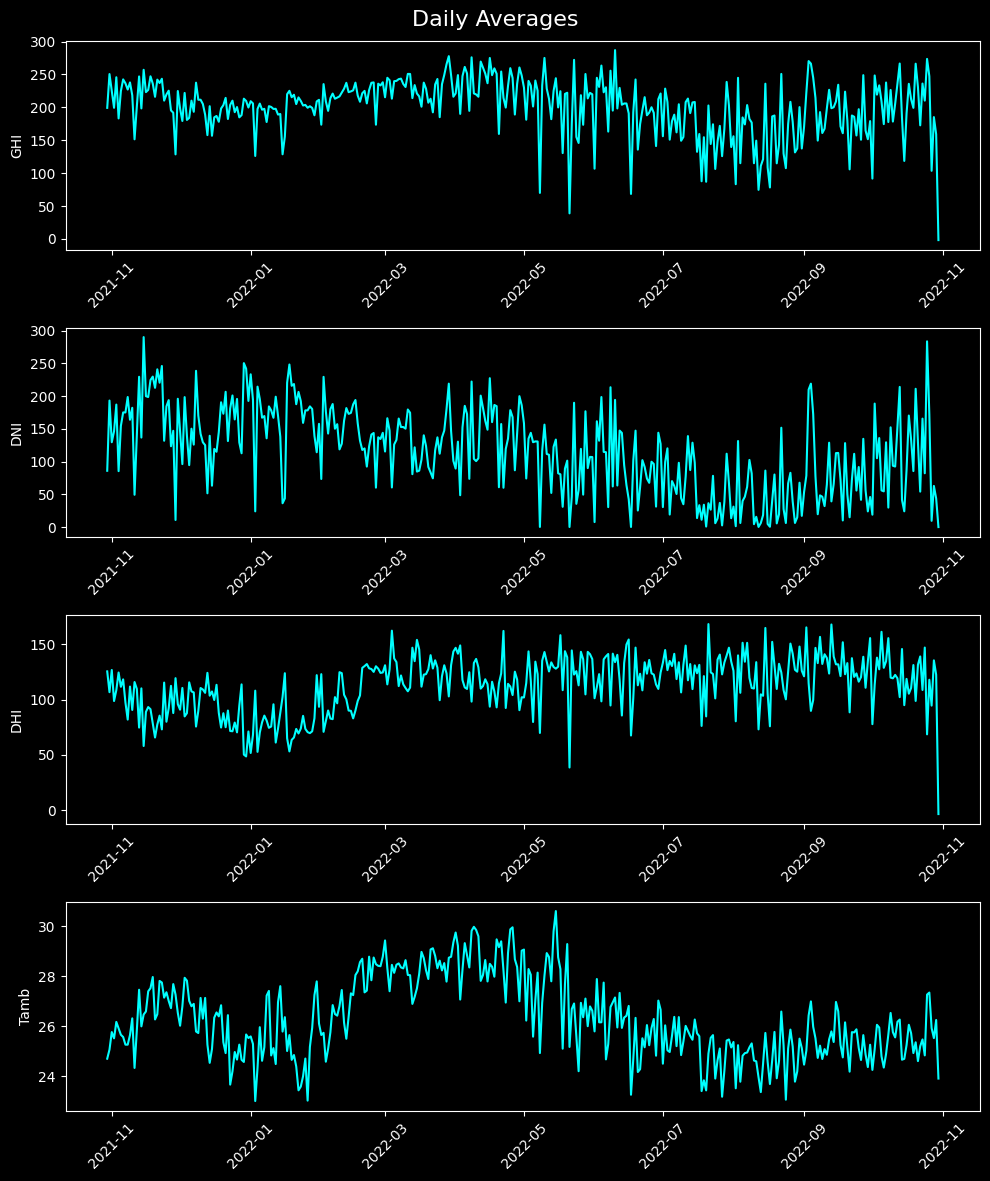

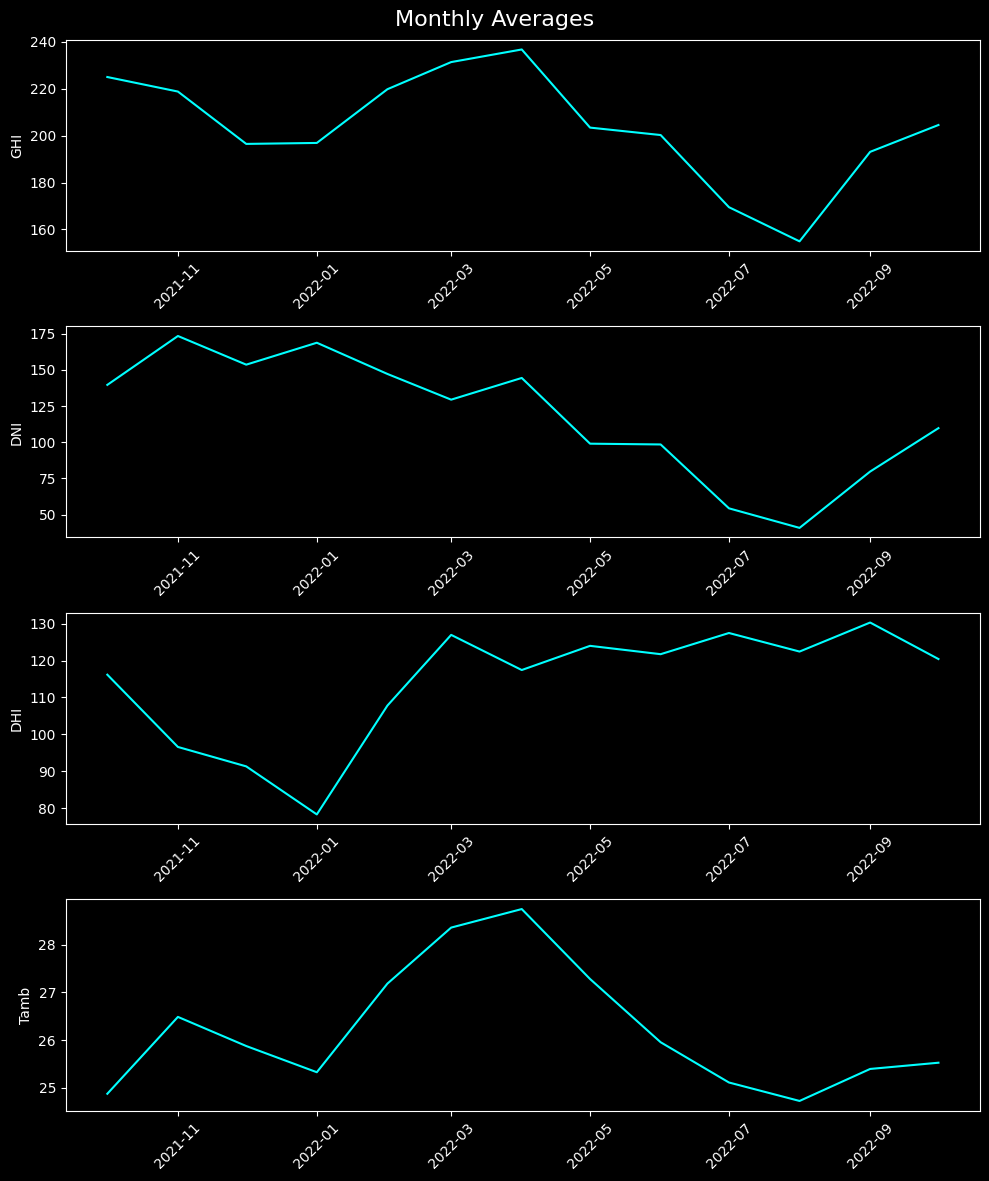

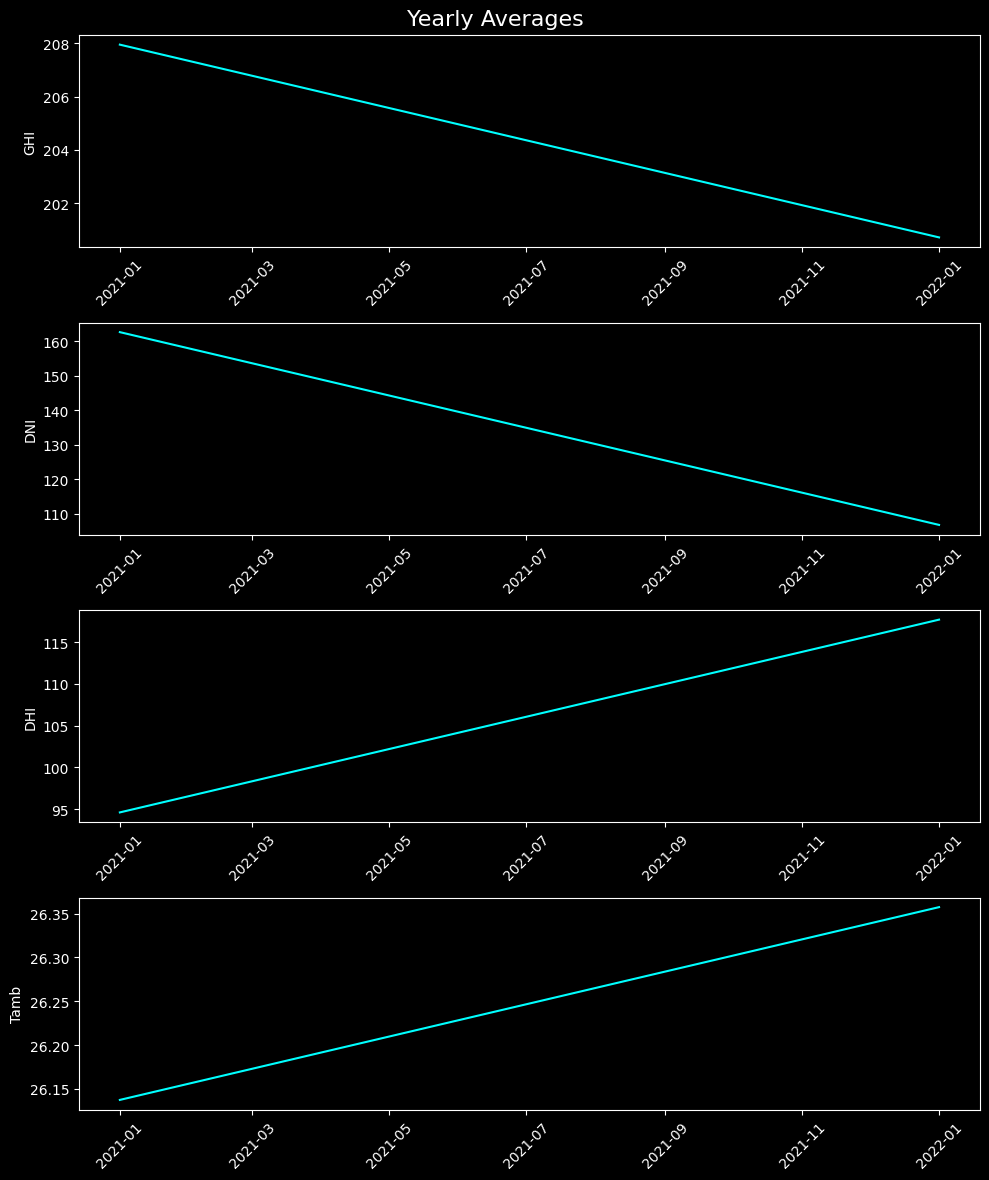

In [20]:
plot_timeseries(sier)

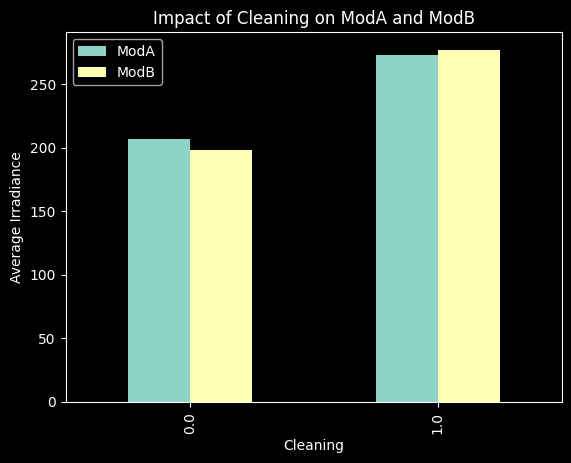

In [21]:
sier.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='Impact of Cleaning on ModA and ModB')
plt.ylabel("Average Irradiance")
plt.show()

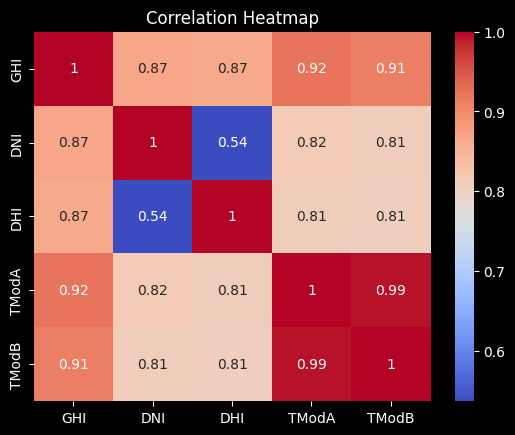

In [22]:
heat_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(sier[heat_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
def corr_wind_solar(data):
    wind_col = ['WS', 'WSgust', 'WD']
    solar_col = ['GHI', 'DNI', 'DHI']

    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))

    for i, wind in enumerate(wind_col):
        for j, solar in enumerate(solar_col):
            sns.scatterplot(x=data[wind], y=data[solar], ax=axes[i, j])
            axes[i, j].set_title(f'{wind} vs {solar}')
            axes[i, j].tick_params(axis='x', rotation=45)
            axes[i, j].set_xlabel(wind)
            axes[i, j].set_ylabel(solar)


    plt.suptitle("Scatter Matrix: Wind Conditions and Solar Irradiance")
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

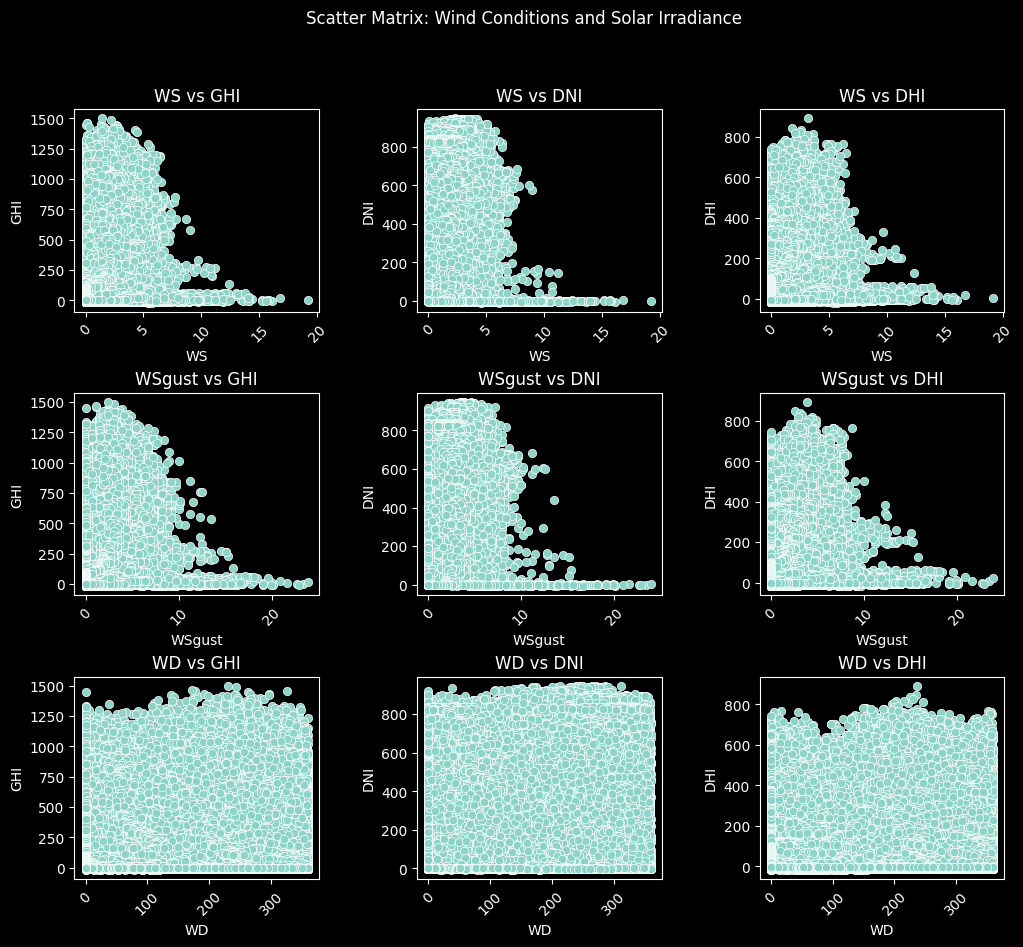

In [24]:
corr_wind_solar(sier)

In [25]:
def freq_histograms(data: pd.DataFrame):

    cols = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

    num_rows = 3
    num_cols = 3

    fig, axes = plt.subplots(ncols= num_cols, nrows=num_rows, figsize=(12,10))

    for i, col in enumerate(cols):
        row = i // 3
        col_idx = i % 3

        axes[row, col_idx].hist(data[col], bins=20, edgecolor='white')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')

    # Remove empty subplots if there are any
    for i in range(len(cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout(pad=2.0)
    plt.show()

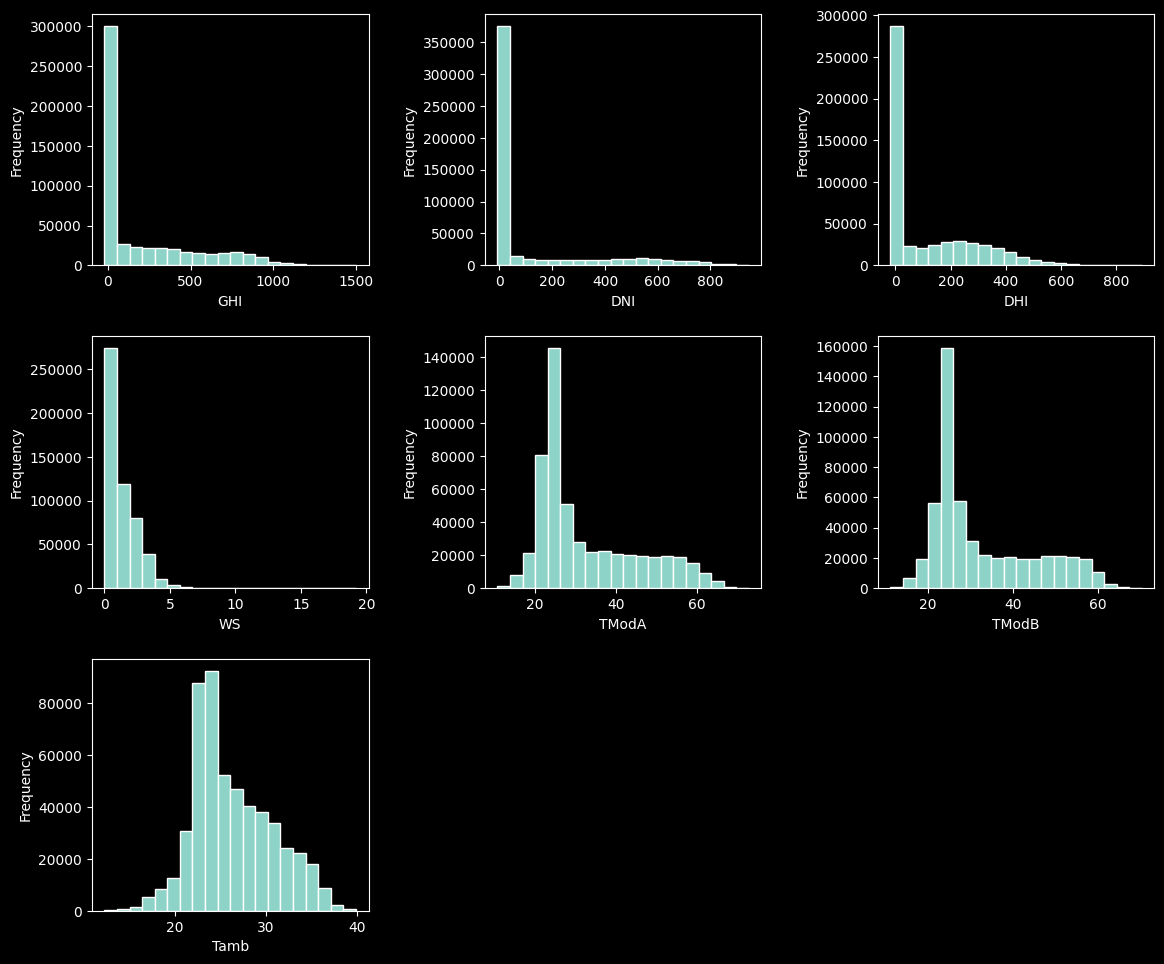

In [26]:
freq_histograms(sier)

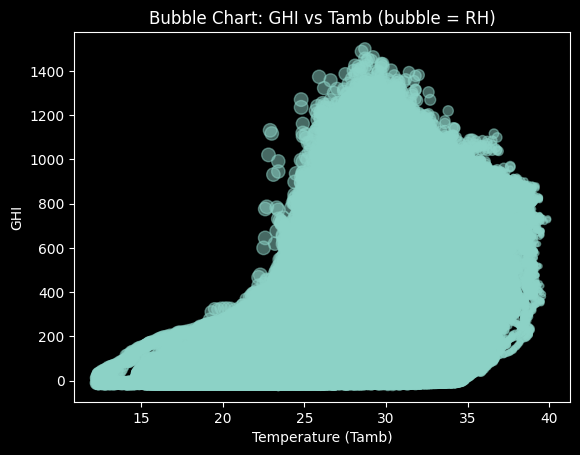

In [27]:
plt.scatter(sier['Tamb'], sier['GHI'], s=sier['RH'], alpha=0.5)
plt.xlabel("Temperature (Tamb)")
plt.ylabel("GHI")
plt.title("Bubble Chart: GHI vs Tamb (bubble = RH)")
plt.show()